# WKB Examples for Schroedinger-like eqs #

## Support materials for Perturbation Methods using backward error ##
### by Corless & Fillion ###
#### to be published by SIAM ####

Copyright (c) 2024 Robert M. Corless

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
WKB2Q := proc( Q::operator, x, eps, {a:=0})
 local xi, residual, S, y;
 S := int( sqrt(Q(xi)), xi=a..x );
 y := exp(S/eps)*Q(x)^(-1/4);
 residual := simplify( eps^2*diff(y,x,x)/y-Q(x));
 y := [y ,exp(-S/eps)*Q(x)^(-1/4)];
 return y, residual
end:

kilobytes used=1808, alloc=5424, time=0.36

In [2]:
(y,res) := WKB2Q( x->x^2/4+a, x, varepsilon ):
y[1];

kilobytes used=5293, alloc=14897, time=0.75

$$\frac{{\mathrm e}^{\frac{-a \ln \left(2\right)-\frac{a \ln \left(a \right)}{2}+\frac{x \sqrt{x^{2}+4 a}}{4}+a \ln \left(x +\sqrt{x^{2}+4 a}\right)}{\varepsilon}}}{\left(\frac{x^{2}}{4}+a \right)^{\frac{1}{4}}}$$

In [3]:
y[2], res;

$$\frac{{\mathrm e}^{-\frac{-a \ln \left(2\right)-\frac{a \ln \left(a \right)}{2}+\frac{x \sqrt{x^{2}+4 a}}{4}+a \ln \left(x +\sqrt{x^{2}+4 a}\right)}{\varepsilon}}}{\left(\frac{x^{2}}{4}+a \right)^{\frac{1}{4}}}$$,$$-\frac{\varepsilon^{2} \left(-3 x^{2}+8 a \right)}{4 \left(x^{2}+4 a \right)^{2}}$$

In [4]:
WKB2Q( x->1+x^2, x, varepsilon );

| | |
|:-:|:-:|
|exp((1/2*x*(x^2+1)^(1/2)+1/2*arcsinh(x))/varepsilon)/(x^2+1)^(1/4)|exp(-(1/2*x*(x^2+1)^(1/2)+1/2*arcsinh(x))/varepsilon)/(x^2+1)^(1/4)|
,$$\frac{\varepsilon^{2} \left(3 x^{2}-2\right)}{4 \left(x^{2}+1\right)^{2}}$$

In [5]:
WKB2Q( x->exp(-x), x, varepsilon );

| | |
|:-:|:-:|
|exp((2-2*exp(-x)^(1/2))/varepsilon)/exp(-x)^(1/4)|exp(-(2-2*exp(-x)^(1/2))/varepsilon)/exp(-x)^(1/4)|
,$$\frac{\varepsilon^{2}}{16}$$

In [6]:
WKB2Q( x->1/x^2, x, varepsilon ); # Took a long time, and properly choked

            \ x  /                   \ x  /

| | |
|:-:|:-:|
|exp(int((1/xi^2)^(1/2),xi = 0 .. x)/varepsilon)/(1/x^2)^(1/4)|exp(-int((1/xi^2)^(1/2),xi = 0 .. x)/varepsilon)/(1/x^2)^(1/4)|
,$$-\frac{\varepsilon^{2}}{4 x^{2}}$$

In [7]:
WKB2Q( x->1/x^2, x, varepsilon, a=1) assuming x>0;

| | |
|:-:|:-:|
|exp(ln(x)/varepsilon)/(1/x^2)^(1/4)|exp(-ln(x)/varepsilon)/(1/x^2)^(1/4)|
,$$-\frac{\varepsilon^{2}}{4 x^{2}}$$

In [8]:
WKB2Q( x->cos(x), x, varepsilon, a=0) assuming x>0;

kilobytes used=3005145, alloc=45552, time=317.59

| | |
|:-:|:-:|
|exp((piecewise(1 <= 1/4*x/Pi,-4*I*floor(1/4*x/Pi)*EllipticE(2^(1/2)),0)+piecewise(0 <= x-2*Pi,-4*I*(floor(-1/4*(-x+2*Pi)/Pi)+1)*EllipticE(2^(1/2)),0)+piecewise(1 <= 1/8*(2*x+3*Pi)/Pi,4*I*floor(1/8*(2*x+3*Pi)/Pi)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+piecewise(1 <= 1/8*(2*x+Pi)/Pi,4*I*floor(1/8*(2*x+Pi)/Pi)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+piecewise(0 <= 2*x-Pi,4*I*(floor(-1/8*(-2*x+Pi)/Pi)+1)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+piecewise(0 <= 2*x-3*Pi,4*I*(floor(-1/8*(-2*x+3*Pi)/Pi)+1)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+2*(signum(sin(1/2*x))^3*(1-2*cos(1/2*x)^2)^(1/2)*EllipticE(cos(1/2*x),2^(1/2))-I*EllipticE(2^(1/2))*(1-2*sin(1/2*x)^2)^(1/2))/(1-2*sin(1/2*x)^2)^(1/2))/varepsilon)/cos(x)^(1/4)|exp(-(piecewise(1 <= 1/4*x/Pi,-4*I*floor(1/4*x/Pi)*EllipticE(2^(1/2)),0)+piecewise(0 <= x-2*Pi,-4*I*(floor(-1/4*(-x+2*Pi)/Pi)+1)*EllipticE(2^(1/2)),0)+piecewise(1 <= 1/8*(2*x+3*Pi)/Pi,4*I*floor(1/8*(2*x+3*Pi)/Pi)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+piecewise(1 <= 1/8*(2*x+Pi)/Pi,4*I*floor(1/8*(2*x+Pi)/Pi)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+piecewise(0 <= 2*x-Pi,4*I*(floor(-1/8*(-2*x+Pi)/Pi)+1)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+piecewise(0 <= 2*x-3*Pi,4*I*(floor(-1/8*(-2*x+3*Pi)/Pi)+1)*EllipticE(1/2*2^(1/2),2^(1/2)),0)+2*(signum(sin(1/2*x))^3*(1-2*cos(1/2*x)^2)^(1/2)*EllipticE(cos(1/2*x),2^(1/2))-I*EllipticE(2^(1/2))*(1-2*sin(1/2*x)^2)^(1/2))/(1-2*sin(1/2*x)^2)^(1/2))/varepsilon)/cos(x)^(1/4)|
,$$\frac{5 \csc \left(\frac{x}{2}\right) \mathrm{signum}\left(\sin \left(\frac{x}{2}\right)\right) \left(-\frac{32 {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{3 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{3 \pi}{2} 
\\
 {{\lfloor -\frac{-2 x +3 \pi}{8 \pi}\rfloor}^{\left(1\right)}}^{2} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right)^{2} & \frac{3 \pi}{2}<x  
\end{array}\right.\right)}{5}-\frac{32 {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{5 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{5 \pi}{2} 
\\
 {{\lfloor \frac{2 x +3 \pi}{8 \pi}\rfloor}^{\left(1\right)}}^{2} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right)^{2} & \frac{5 \pi}{2}<x  
\end{array}\right.\right)}{5}-\frac{32 {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{\pi}{2} 
\\
 \mathit{undefined}  & x =\frac{\pi}{2} 
\\
 {{\lfloor -\frac{-2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)}}^{2} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right)^{2} & \frac{\pi}{2}<x  
\end{array}\right.\right)}{5}-\frac{32 {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{7 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{7 \pi}{2} 
\\
 {{\lfloor \frac{2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)}}^{2} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right)^{2} & \frac{7 \pi}{2}<x  
\end{array}\right.\right)}{5}+\frac{\left(\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <\frac{5 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{5 \pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor \frac{2 x +3 \pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{5 \pi}{2}<x  
\end{array}\right.\right)}{5}+\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <\frac{\pi}{2} 
\\
 \mathit{undefined}  & x =\frac{\pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor -\frac{-2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{\pi}{2}<x  
\end{array}\right.\right)}{5}+\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <\frac{7 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{7 \pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor \frac{2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{7 \pi}{2}<x  
\end{array}\right.\right)}{5}-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 \mathit{undefined}  & x =2 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 2 \pi <x  
\end{array}\right.\right)}{5}-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)}{5}+\varepsilon  \left(\frac{1}{80}+\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{7}+\frac{\cos \left(\frac{x}{2}\right)^{3} \sin \left(\frac{x}{2}\right)}{8}+\frac{4 \cos \left(\frac{x}{2}\right)^{12}}{5}+3 \cos \left(\frac{x}{2}\right)^{8}\right)\right) {| \sin \left(\frac{x}{2}\right)|} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{3 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{3 \pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor -\frac{-2 x +3 \pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{3 \pi}{2}<x  
\end{array}\right.\right)}{2}+\frac{\left(\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <\frac{\pi}{2} 
\\
 \mathit{undefined}  & x =\frac{\pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor -\frac{-2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{\pi}{2}<x  
\end{array}\right.\right)}{5}+\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <\frac{7 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{7 \pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor \frac{2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{7 \pi}{2}<x  
\end{array}\right.\right)}{5}-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 \mathit{undefined}  & x =2 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 2 \pi <x  
\end{array}\right.\right)}{5}-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)}{5}+\varepsilon  \left(\frac{1}{80}+\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{7}+\frac{\cos \left(\frac{x}{2}\right)^{3} \sin \left(\frac{x}{2}\right)}{8}+\frac{4 \cos \left(\frac{x}{2}\right)^{12}}{5}+3 \cos \left(\frac{x}{2}\right)^{8}\right)\right) {| \sin \left(\frac{x}{2}\right)|} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{5 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{5 \pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor \frac{2 x +3 \pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{5 \pi}{2}<x  
\end{array}\right.\right)}{2}+\frac{4 \,\mathrm{I} \left(-\frac{3 \cos \left(x \right)^{\frac{13}{2}} \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)}{8}+\left(\frac{\left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right) \cos \left(x \right)^{\frac{11}{2}}}{8}+\varepsilon  \cos \left(\frac{x}{2}\right) \left(\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{10}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{8}}{2}-6 \cos \left(\frac{x}{2}\right)^{9}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{4}}{4}-5 \cos \left(\frac{x}{2}\right)^{5}+\frac{15 \cos \left(\frac{x}{2}\right)^{3}}{8}-\frac{\sin \left(\frac{x}{2}\right)}{32}-\frac{3 \cos \left(\frac{x}{2}\right)}{8}\right)\right) \sqrt{-\cos \left(x \right)}\right) {| \sin \left(\frac{x}{2}\right)|} \left(\left\{\begin{array}{cc}
0 & x <\frac{\pi}{2} 
\\
 undefined  \mathrm{I} & x =\frac{\pi}{2} 
\\
 {\lfloor -\frac{-2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{\pi}{2}<x  
\end{array}\right.\right)}{5}+\frac{4 \,\mathrm{I} \left(-\frac{3 \cos \left(x \right)^{\frac{13}{2}} \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)}{8}+\left(\frac{\left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right) \cos \left(x \right)^{\frac{11}{2}}}{8}+\varepsilon  \cos \left(\frac{x}{2}\right) \left(\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{10}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{8}}{2}-6 \cos \left(\frac{x}{2}\right)^{9}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{4}}{4}-5 \cos \left(\frac{x}{2}\right)^{5}+\frac{15 \cos \left(\frac{x}{2}\right)^{3}}{8}-\frac{\sin \left(\frac{x}{2}\right)}{32}-\frac{3 \cos \left(\frac{x}{2}\right)}{8}\right)\right) \sqrt{-\cos \left(x \right)}\right) {| \sin \left(\frac{x}{2}\right)|} \left(\left\{\begin{array}{cc}
0 & x <\frac{5 \pi}{2} 
\\
 undefined  \mathrm{I} & x =\frac{5 \pi}{2} 
\\
 {\lfloor \frac{2 x +3 \pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{5 \pi}{2}<x  
\end{array}\right.\right)}{5}+\frac{\left(\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <\frac{7 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{7 \pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor \frac{2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{7 \pi}{2}<x  
\end{array}\right.\right)}{5}-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 \mathit{undefined}  & x =2 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 2 \pi <x  
\end{array}\right.\right)}{5}-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)}{5}+\varepsilon  \left(\frac{1}{80}+\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{7}+\frac{\cos \left(\frac{x}{2}\right)^{3} \sin \left(\frac{x}{2}\right)}{8}+\frac{4 \cos \left(\frac{x}{2}\right)^{12}}{5}+3 \cos \left(\frac{x}{2}\right)^{8}\right)\right) {| \sin \left(\frac{x}{2}\right)|} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{\pi}{2} 
\\
 \mathit{undefined}  & x =\frac{\pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor -\frac{-2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{\pi}{2}<x  
\end{array}\right.\right)}{2}+\frac{{| \sin \left(\frac{x}{2}\right)|} \left(-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 \mathit{undefined}  & x =2 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 2 \pi <x  
\end{array}\right.\right)}{5}-\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)}{5}+\varepsilon  \left(\frac{1}{80}+\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{7}+\frac{\cos \left(\frac{x}{2}\right)^{3} \sin \left(\frac{x}{2}\right)}{8}+\frac{4 \cos \left(\frac{x}{2}\right)^{12}}{5}+3 \cos \left(\frac{x}{2}\right)^{8}\right)\right) \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <\frac{7 \pi}{2} 
\\
 \mathit{undefined}  & x =\frac{7 \pi}{2} 
\\
 4 \,\mathrm{I} {\lfloor \frac{2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{7 \pi}{2}<x  
\end{array}\right.\right)}{2}+\frac{4 \,\mathrm{I} \left(-\frac{3 \cos \left(x \right)^{\frac{13}{2}} \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)}{8}+\left(\frac{\left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right) \cos \left(x \right)^{\frac{11}{2}}}{8}+\varepsilon  \cos \left(\frac{x}{2}\right) \left(\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{10}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{8}}{2}-6 \cos \left(\frac{x}{2}\right)^{9}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{4}}{4}-5 \cos \left(\frac{x}{2}\right)^{5}+\frac{15 \cos \left(\frac{x}{2}\right)^{3}}{8}-\frac{\sin \left(\frac{x}{2}\right)}{32}-\frac{3 \cos \left(\frac{x}{2}\right)}{8}\right)\right) \sqrt{-\cos \left(x \right)}\right) {| \sin \left(\frac{x}{2}\right)|} \left(\left\{\begin{array}{cc}
0 & x <\frac{3 \pi}{2} 
\\
 undefined  \mathrm{I} & x =\frac{3 \pi}{2} 
\\
 {\lfloor -\frac{-2 x +3 \pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{3 \pi}{2}<x  
\end{array}\right.\right)}{5}+\mathrm{I} \left(\frac{\left(-\cos \left(\frac{x}{2}\right)^{2}+\frac{1}{2}\right) \cos \left(x \right)^{\frac{11}{2}}}{10}+\cos \left(\frac{x}{2}\right)^{5} \sin \left(\frac{x}{2}\right) \varepsilon \right) {| \sin \left(\frac{x}{2}\right)|} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 undefined  \mathrm{I} & x =4 \pi  
\\
 {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)-\frac{32 {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 \mathit{undefined}  & x =2 \pi  
\\
 {{\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)}}^{2} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right)^{2} & 2 \pi <x  
\end{array}\right.\right)}{5}+\frac{{| \sin \left(\frac{x}{2}\right)|} \left(\frac{8 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)}{5}+\frac{3 \cos \left(x \right)^{\frac{13}{2}} \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)}{20}+\varepsilon  \cos \left(\frac{x}{2}\right) \sqrt{-\cos \left(x \right)} \left(\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{8}+\frac{12 \cos \left(\frac{x}{2}\right)^{9}}{5}+2 \cos \left(\frac{x}{2}\right)^{5}+\frac{\sin \left(\frac{x}{2}\right)}{80}+\frac{3 \cos \left(\frac{x}{2}\right)}{20}\right)\right) \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 \mathit{undefined}  & x =2 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 2 \pi <x  
\end{array}\right.\right)}{2}+\frac{4 \,\mathrm{I} \left(-\frac{3 \cos \left(x \right)^{\frac{13}{2}} \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)}{8}+\left(\frac{\left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right) \cos \left(x \right)^{\frac{11}{2}}}{8}+\varepsilon  \cos \left(\frac{x}{2}\right) \left(\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{10}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{8}}{2}-6 \cos \left(\frac{x}{2}\right)^{9}-\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{4}}{4}-5 \cos \left(\frac{x}{2}\right)^{5}+\frac{15 \cos \left(\frac{x}{2}\right)^{3}}{8}-\frac{\sin \left(\frac{x}{2}\right)}{32}-\frac{3 \cos \left(\frac{x}{2}\right)}{8}\right)\right) \sqrt{-\cos \left(x \right)}\right) {| \sin \left(\frac{x}{2}\right)|} \left(\left\{\begin{array}{cc}
0 & x <\frac{7 \pi}{2} 
\\
 undefined  \mathrm{I} & x =\frac{7 \pi}{2} 
\\
 {\lfloor \frac{2 x +\pi}{8 \pi}\rfloor}^{\left(1\right)} E\left(\frac{\sqrt{2}}{2}, \sqrt{2}\right) & \frac{7 \pi}{2}<x  
\end{array}\right.\right)}{5}-\frac{4 \varepsilon  {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{11} \sin \left(\frac{x}{2}\right)+2 \cos \left(\frac{x}{2}\right)^{12}+\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{7}}{2}+\frac{15 \cos \left(\frac{x}{2}\right)^{8}}{2}+\frac{5 \cos \left(\frac{x}{2}\right)^{3} \sin \left(\frac{x}{2}\right)}{16}+\frac{15 \cos \left(\frac{x}{2}\right)^{4}}{8}+\frac{1}{32}\right) \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 \mathit{undefined}  & x =2 \pi  
\\
 \mathrm{I} {\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 2 \pi <x  
\end{array}\right.\right)}{5}-\frac{32 {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 {{\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)}}^{2} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right)^{2} & 4 \pi <x  
\end{array}\right.\right)}{5}+\frac{{| \sin \left(\frac{x}{2}\right)|} \left(\frac{3 \cos \left(x \right)^{\frac{13}{2}} \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)}{20}+\varepsilon  \cos \left(\frac{x}{2}\right) \sqrt{-\cos \left(x \right)} \left(\sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{8}+\frac{12 \cos \left(\frac{x}{2}\right)^{9}}{5}+2 \cos \left(\frac{x}{2}\right)^{5}+\frac{\sin \left(\frac{x}{2}\right)}{80}+\frac{3 \cos \left(\frac{x}{2}\right)}{20}\right)\right) \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 4 \,\mathrm{I} {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)}{2}+\mathrm{I} \left(\frac{\left(-\cos \left(\frac{x}{2}\right)^{2}+\frac{1}{2}\right) \cos \left(x \right)^{\frac{11}{2}}}{10}+\cos \left(\frac{x}{2}\right)^{5} \sin \left(\frac{x}{2}\right) \varepsilon \right) {| \sin \left(\frac{x}{2}\right)|} \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <2 \pi  
\\
 undefined  \mathrm{I} & x =2 \pi  
\\
 {\lfloor \frac{x -2 \pi}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 2 \pi <x  
\end{array}\right.\right)-\frac{4 \varepsilon  {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{11} \sin \left(\frac{x}{2}\right)+2 \cos \left(\frac{x}{2}\right)^{12}+\frac{5 \sin \left(\frac{x}{2}\right) \cos \left(\frac{x}{2}\right)^{7}}{2}+\frac{15 \cos \left(\frac{x}{2}\right)^{8}}{2}+\frac{5 \cos \left(\frac{x}{2}\right)^{3} \sin \left(\frac{x}{2}\right)}{16}+\frac{15 \cos \left(\frac{x}{2}\right)^{4}}{8}+\frac{1}{32}\right) \sqrt{-\cos \left(x \right)} \left(\left\{\begin{array}{cc}
0 & x <4 \pi  
\\
 \mathit{undefined}  & x =4 \pi  
\\
 \mathrm{I} {\lfloor \frac{x}{4 \pi}\rfloor}^{\left(1\right)} \boldsymbol{\mathit{E}}\left(\sqrt{2}\right) & 4 \pi <x  
\end{array}\right.\right)}{5}-\frac{72 \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right)^{2} {| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6} \sqrt{-\cos \left(x \right)} E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)^{2}}{5}-\frac{3 \,\mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) \left(2 \cos \left(x \right)^{\frac{13}{2}} \varepsilon  \,\mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right) \sin \left(\frac{x}{2}\right)+{| \sin \left(\frac{x}{2}\right)|} \left(\sin \left(\frac{x}{2}\right) \cos \left(x \right)^{\frac{11}{2}} \varepsilon  \cos \left(\frac{x}{2}\right)+\cos \left(x \right)^{\frac{13}{2}} \varepsilon +256 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{7}\right)\right) E\left(\cos \left(\frac{x}{2}\right), \sqrt{2}\right)}{80}-\frac{3 \varepsilon  \left(-4 \cos \left(x \right)^{\frac{11}{2}} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right) \sin \left(\frac{x}{2}\right) \mathrm{signum}\left(1, \sin \left(\frac{x}{2}\right)\right)+{| \sin \left(\frac{x}{2}\right)|} \left(\cos \left(x \right)^{\frac{11}{2}} \cos \left(\frac{x}{2}\right) \sin \left(\frac{x}{2}\right)-2 \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right) \left(\cos \left(\frac{x}{2}\right) \sin \left(\frac{x}{2}\right) \cos \left(x \right)^{\frac{9}{2}}-\frac{2 \varepsilon  \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{3} \left(\cos \left(\frac{x}{2}\right)^{4}-\cos \left(\frac{x}{2}\right)^{2}-1\right)}{3}\right)\right)\right) \sqrt{-\cos \left(x \right)}}{160}\right)}{2 \sqrt{-\cos \left(x \right)} \left(\cos \left(\frac{x}{2}\right)^{2}-\frac{1}{2}\right)^{6}}$$

In [9]:
(y,res) := WKB2Q( x->1/(1+x^2), x, varepsilon ) assuming x>0;

| | |
|:-:|:-:|
|exp(arcsinh(x)/varepsilon)/(1/(x^2+1))^(1/4)|exp(-arcsinh(x)/varepsilon)/(1/(x^2+1))^(1/4)|
,$$-\frac{\varepsilon^{2} \left(x^{2}-2\right)}{4 \left(x^{2}+1\right)^{2}}$$

In [10]:
hey := simplify( convert(y[1],ln) ) assuming varepsilon > 0, x>0;

$$\left(x +\sqrt{x^{2}+1}\right)^{\frac{1}{\varepsilon}} \left(x^{2}+1\right)^{\frac{1}{4}}$$

kilobytes used=3020326, alloc=45552, time=321.28

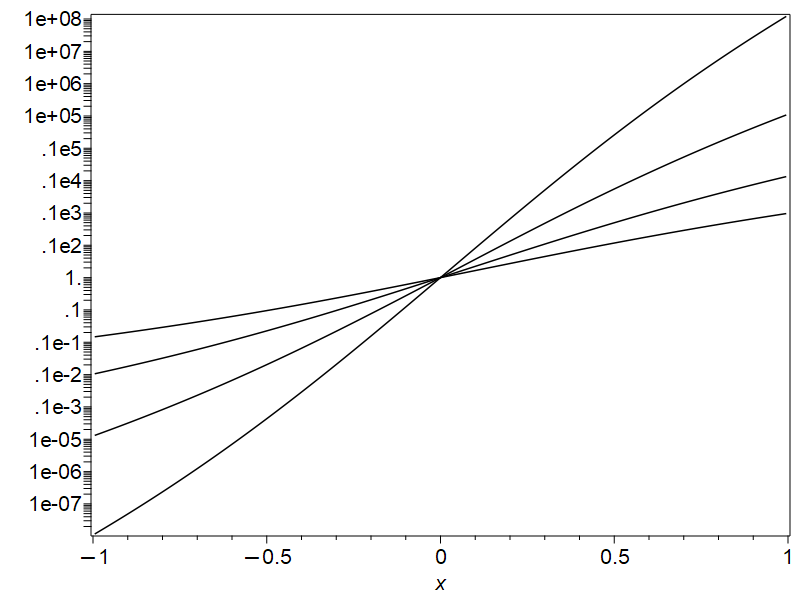

In [11]:
plots[logplot]( [seq(eval(hey,varepsilon=e),e=[1/5,1/8,1/13,1/21])],x=-1..1 );

In [12]:
macro(ep=varepsilon):
de := y -> ep^2*diff(y,x,x) - y/(1+x^2);
y := 'y':
dey := de(y(x));
#dsolve( de(y(x)), y(x));

                                       \dx      /   x  + 1

$$\varepsilon^{2} \left(\frac{d^{2}}{d x^{2}}y \left(x \right)\right)-\frac{y \left(x \right)}{x^{2}+1}$$

In [13]:
dsolve( de(y(x)), y(x));

$$y \left(x \right) = c_{1} \left(x^{2}+1\right) {}_{2}^{}{\moversetsp{}{\mundersetsp{}{F_{1}^{}}}}\left(-\frac{\sqrt{\varepsilon +2 \,\mathrm{I}} \sqrt{\varepsilon -2 \,\mathrm{I}}-3 \varepsilon}{4 \varepsilon},\frac{3 \varepsilon +\sqrt{\varepsilon +2 \,\mathrm{I}} \sqrt{\varepsilon -2 \,\mathrm{I}}}{4 \varepsilon};\frac{1}{2};-x^{2}\right)+c_{2} \left(x^{2}+1\right) {}_{2}^{}{\moversetsp{}{\mundersetsp{}{F_{1}^{}}}}\left(-\frac{\sqrt{\varepsilon +2 \,\mathrm{I}} \sqrt{\varepsilon -2 \,\mathrm{I}}-5 \varepsilon}{4 \varepsilon},\frac{5 \varepsilon +\sqrt{\varepsilon +2 \,\mathrm{I}} \sqrt{\varepsilon -2 \,\mathrm{I}}}{4 \varepsilon};\frac{3}{2};-x^{2}\right) x$$

That "moversetsp\mundersetsp" business is a LaTeX macro that has not been implemented yet in the Jupyter interface.

In [14]:
(y,res) := WKB2Q( x->cosh(x), x, varepsilon ) assuming x>0:
y[1];

$$\frac{{\mathrm e}^{\frac{\sqrt{2} \Pi \left(\sqrt{\frac{\cosh \left(x \right)-1}{\cosh \left(x \right)}}, 1, \frac{\sqrt{2}}{2}\right)}{\varepsilon}}}{\cosh \left(x \right)^{\frac{1}{4}}}$$

In [15]:
res;

$$-\frac{\varepsilon^{2} \left(5 \mathrm{sech}\left(x \right)^{2}-1\right)}{16}$$

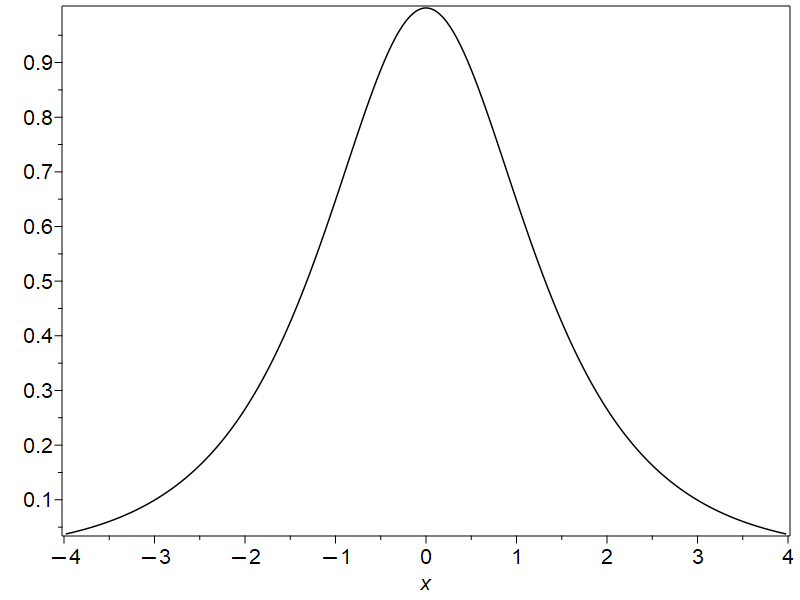

In [16]:
plot(sech(x), x=-4..4);

In [17]:
int( sqrt(cosh(xi)), xi=0..x) assuming x>0;

$$\sqrt{2} \Pi \left(\sqrt{\frac{\cosh \left(x \right)-1}{\cosh \left(x \right)}}, 1, \frac{\sqrt{2}}{2}\right)$$

In [18]:
(y,res) := WKB2Q( x->exp(x)/2, x, varepsilon ):
y[1];

$$\frac{{\mathrm e}^{\frac{-\sqrt{2}+\sqrt{2} \sqrt{{\mathrm e}^{x}}}{\varepsilon}} 2^{\frac{1}{4}}}{\left({\mathrm e}^{x}\right)^{\frac{1}{4}}}$$

In [19]:
res;

$$\frac{\varepsilon^{2}}{16}$$

In [20]:
(y,res) := WKB2Q( x->1+x^4, x, varepsilon ):
y[1];

$$\frac{{\mathrm e}^{\frac{\left(\frac{1}{12}-\frac{\mathrm{I}}{12}\right) \left(\mathrm{I} \sqrt{2} x^{5}+\sqrt{2} x^{5}+\mathrm{I} x \sqrt{2}+4 \sqrt{1-\mathrm{I} x^{2}} \sqrt{1+\mathrm{I} x^{2}} F\left(\left(\frac{1}{2}+\frac{\mathrm{I}}{2}\right) x \sqrt{2}, \mathrm{I}\right)+x \sqrt{2}\right) \sqrt{2}}{\sqrt{x^{4}+1} \varepsilon}}}{\left(x^{4}+1\right)^{\frac{1}{4}}}$$

In [21]:
res;

$$\frac{\left(2 x^{4}-3\right) x^{2} \varepsilon^{2}}{\left(x^{2}+\mathrm{I}\right)^{2} \left(\mathrm{I}-x^{2}\right)^{2}}$$